# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk

from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi import NewsApiClient

# nltk.download('vader_lexicon') # r:   run to update, once should it
analyzer=SentimentIntensityAnalyzer()

%matplotlib inline


Bad key text.latex.preview in file /Users/mbl/opt/anaconda3/envs/sqlalchemy__pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/mbl/opt/anaconda3/envs/sqlalchemy__pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/mbl/opt/anaconda3/envs/sqlalchemy__pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, 

In [2]:
# Read your api key environment variable
load_dotenv()

api_key=os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news=newsapi.get_everything(
    q='BTC AND Bitcoin AND bitcoin',
    page_size=100,
    language='en',
    sort_by='relevancy'
)

btc_news

{'status': 'ok',
 'totalResults': 1811,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': None, 'name': 'BNNBloomberg.ca'},
   'au

In [5]:
# Fetch the Ethereum news articles
eth_news=newsapi.get_everything(
    q='ETH AND Ethereum AND ethereum',
    page_size=100,
    language='en',
    sort_by='relevancy'
)

eth_news

{'status': 'ok',
 'totalResults': 873,
 'articles': [{'source': {'id': 'the-verge', 'name': 'The Verge'},
   'author': 'Corin Faife',
   'title': 'Crypto.com admits over $30 million stolen by hackers',
   'description': 'Cryptocurrency exchange Crypto.com has said that $15 million in ethereum and $18 million in bitcoin were stolen by hackers in a security breach',
   'url': 'https://www.theverge.com/2022/1/20/22892958/crypto-com-exchange-hack-bitcoin-ethereum-security',
   'urlToImage': 'https://cdn.vox-cdn.com/thumbor/mde_l3lUC4muDPEFG7LYrUz0O3g=/0x146:2040x1214/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/8921023/acastro_bitcoin_2.jpg',
   'publishedAt': '2022-01-20T13:23:31Z',
   'content': 'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars]'},
  {'source': {'id': 'engadget', 'name': 'Engadget'},
   'auth

In [6]:
# r:    sentiment score function
def crypto_sent_score(article):

    crypto_sent=[]
    
    for article in article['articles']:
        try:
            text=article['content']
            date=article['publishedAt'][:10]
            sentiment=analyzer.polarity_scores(text)
            pos=sentiment["pos"]
            neg=sentiment["neg"]
            neu=sentiment["neu"]
            compound=sentiment['compound']
            crypto_sent.append({
                'date':date,
                'positive':pos,
                'negative':neg,
                'neutral':neu,
                'compound':compound,
                'text':text
            })
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(crypto_sent)
    return df

In [7]:
# Create the Bitcoin sentiment scores DataFrame
sentiment_btc_df = crypto_sent_score(btc_news)

sentiment_btc_df

,date,positive,negative,neutral,compound,text
0,2022-01-20,0.000,0.000,1.000,0.0000,"In a new blog post the company said that 4,836..."
1,2022-01-11,0.063,0.156,0.781,-0.5563,After one of roughest patches ever for Bitcoin...
2,2022-01-20,0.046,0.000,0.954,0.1027,"In an interview with Bloomberg TV, Crypto.com'..."
3,2022-01-14,0.000,0.093,0.907,-0.3400,"LONDON, Jan 14 (Reuters) - Kazakhstan may no l..."
4,2022-02-09,0.148,0.075,0.776,0.4767,Bitcoin billionaire Mike Novogratz has said th...
...,...,...,...,...,...,...
95,2022-02-02,0.061,0.056,0.884,0.0516,68% 10:38 MTS RUs e ( Search BRD Bitcoin B Wal...
96,2022-01-30,0.069,0.000,0.931,0.3818,It was a 3rd consecutive day in the green for ...
97,2022-01-26,0.178,0.000,0.822,0.6369,<ul><li>Real Bedford FC partnered with OpenNod...
98,2022-01-25,0.000,0.081,0.919,-0.3182,Beautifulblossom/iStock Editorial via Getty Im...


In [8]:
# Create the Ethereum sentiment scores DataFrame
sentiment_eth_df=crypto_sent_score(eth_news)

sentiment_eth_df.describe()

,positive,negative,neutral,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.084480,0.047580,0.867940,0.153296
std,0.072405,0.066369,0.096744,0.432663
min,0.000000,0.000000,0.596000,-0.765000
25%,0.000000,0.000000,0.802500,-0.052050
50%,0.079500,0.000000,0.873000,0.177900
75%,0.131000,0.091250,0.937250,0.514625
max,0.309000,0.232000,1.000000,0.858800


In [9]:
# Describe the Bitcoin Sentiment
sentiment_btc_df.describe()

,positive,negative,neutral,compound
count,100.000000,100.000000,100.00000,100.000000
mean,0.066100,0.045810,0.88812,0.075925
std,0.069468,0.057056,0.08041,0.420211
min,0.000000,0.000000,0.67400,-0.802000
25%,0.000000,0.000000,0.82575,-0.232225
50%,0.063000,0.000000,0.88750,0.032250
75%,0.105250,0.083500,0.94250,0.393200
max,0.302000,0.204000,1.00000,0.924600


In [10]:
# Describe the Ethereum Sentiment
sentiment_eth_df.describe()

,positive,negative,neutral,compound
count,100.000000,100.000000,100.000000,100.000000
mean,0.084480,0.047580,0.867940,0.153296
std,0.072405,0.066369,0.096744,0.432663
min,0.000000,0.000000,0.596000,-0.765000
25%,0.000000,0.000000,0.802500,-0.052050
50%,0.079500,0.000000,0.873000,0.177900
75%,0.131000,0.091250,0.937250,0.514625
max,0.309000,0.232000,1.000000,0.858800


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score based on results from cell 12/50 with: 0.084480

Q: Which coin had the highest compound score?

A: Bitcoin had the hightest compound score based on cell 11/50 with: 0.924600

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score based on results from cell 12/50 with: 0.309000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation

In [12]:
# Instantiate the lemmatizer
ltz=WordNetLemmatizer()

# Create a list of stopwords
sw=set(stopwords.words('english'))

# r:    examine stopword list
display(sw)

# Expand the default stopwords list if necessary
sw_expand={'said','n','actually','although','either','whoever'}

# r:    examine expanded stopword list
display()
display(sw_expand)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

{'actually', 'although', 'either', 'n', 'said', 'whoever'}

In [13]:
# Complete the tokenizer function
def toker(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    re_comp=re.compile("[^a-zA-Z ]")
  
    # r:    Apply regex parameters to text
    re_clean=re_comp.sub('',text)
   
    # Create a tokenized list of the words
    words=word_tokenize(re_clean)
    
    # Lemmatize words into root words
    words_ltz=[ltz.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stopwords with expanded stopwords list 
    word_sw_tokens=[word.lower() for word in words if word.lower() not in sw.union(sw_expand)]

    return word_sw_tokens

In [14]:
# Create a new tokens column for Bitcoin
sentiment_btc_df['tokens'] = sentiment_btc_df['text'].apply(toker)
toker_btc_df=sentiment_btc_df

display(toker_btc_df)

,date,positive,negative,neutral,compound,text,tokens
0,2022-01-20,0.000,0.000,1.000,0.0000,"In a new blog post the company said that 4,836...","[new, blog, post, company, eth, bitcoin, taken..."
1,2022-01-11,0.063,0.156,0.781,-0.5563,After one of roughest patches ever for Bitcoin...,"[one, roughest, patches, ever, bitcoin, enthus..."
2,2022-01-20,0.046,0.000,0.954,0.1027,"In an interview with Bloomberg TV, Crypto.com'...","[interview, bloomberg, tv, cryptocoms, chief, ..."
3,2022-01-14,0.000,0.093,0.907,-0.3400,"LONDON, Jan 14 (Reuters) - Kazakhstan may no l...","[london, jan, reuters, kazakhstan, may, longer..."
4,2022-02-09,0.148,0.075,0.776,0.4767,Bitcoin billionaire Mike Novogratz has said th...,"[bitcoin, billionaire, mike, novogratz, recove..."
...,...,...,...,...,...,...,...
95,2022-02-02,0.061,0.056,0.884,0.0516,68% 10:38 MTS RUs e ( Search BRD Bitcoin B Wal...,"[mts, rus, e, search, brd, bitcoin, b, wallet,..."
96,2022-01-30,0.069,0.000,0.931,0.3818,It was a 3rd consecutive day in the green for ...,"[rd, consecutive, day, green, bitcoin, btc, sa..."
97,2022-01-26,0.178,0.000,0.822,0.6369,<ul><li>Real Bedford FC partnered with OpenNod...,"[ullireal, bedford, fc, partnered, opennode, a..."
98,2022-01-25,0.000,0.081,0.919,-0.3182,Beautifulblossom/iStock Editorial via Getty Im...,"[beautifulblossomistock, editorial, via, getty..."


In [15]:
# Create a new tokens column for Ethereum
sentiment_eth_df['tokens'] = sentiment_eth_df['text'].apply(toker)
toker_eth_df=sentiment_eth_df

display(toker_eth_df)

,date,positive,negative,neutral,compound,text,tokens
0,2022-01-20,0.000,0.000,1.000,0.0000,"In a new blog post the company said that 4,836...","[new, blog, post, company, eth, bitcoin, taken..."
1,2022-01-20,0.046,0.000,0.954,0.1027,"In an interview with Bloomberg TV, Crypto.com'...","[interview, bloomberg, tv, cryptocoms, chief, ..."
2,2022-02-03,0.131,0.092,0.778,0.1027,"Online thieves made off with ""wrapped ethereum...","[online, thieves, made, wrapped, ethereum, wor..."
3,2022-02-03,0.051,0.174,0.775,-0.6808,"Online thieves made off with 120,000 wEth, or ...","[online, thieves, made, weth, wrapped, ethereu..."
4,2022-01-19,0.129,0.000,0.871,0.5574,The crypto market's whiplash volatility can ma...,"[crypto, markets, whiplash, volatilitycan, mak..."
...,...,...,...,...,...,...,...
95,2022-01-20,0.202,0.000,0.798,0.7964,The world's second-most valuable cryptocurrenc...,"[worlds, secondmost, valuable, cryptocurrency,..."
96,2022-02-02,0.131,0.055,0.814,0.4391,One of the most popular cross-blockchain bridg...,"[one, popular, crossblockchain, bridges, may, ..."
97,2022-01-26,0.000,0.000,1.000,0.0000,"Nina Smith January 26, 2022Business, FinancesC...","[nina, smith, january, business, financescomme..."
98,2022-01-28,0.000,0.000,1.000,0.0000,It's also at this time that Bitcoin (CRYPTO: B...,"[also, time, bitcoin, crypto, btc, dips, close..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N=2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
def tokens_get(df):
    tokens=[]
    for i in df['tokens']:
        tokens.extend(i)
    return tokens

tokens_btc=tokens_get(sentiment_btc_df)
tokens_eth=tokens_get(sentiment_eth_df)

In [18]:
# r:    Function to generate the N-grams where n=N
def count_bigram(tokens, N):
    count_words= dict(Counter(ngrams(tokens, n=N)))
    return count_words

In [19]:
# Generate the Bitcoin N-grams where N=2
bigram_btc=count_bigram(tokens_btc, 2)

bigram_btc

{('new', 'blog'): 1,
 ('blog', 'post'): 2,
 ('post', 'company'): 1,
 ('company', 'eth'): 1,
 ('eth', 'bitcoin'): 1,
 ('bitcoin', 'takenillustration'): 1,
 ('takenillustration', 'alex'): 1,
 ('alex', 'castro'): 1,
 ('castro', 'vergein'): 1,
 ('vergein', 'blog'): 1,
 ('post', 'published'): 1,
 ('published', 'early'): 1,
 ('early', 'hours'): 1,
 ('hours', 'thursday'): 1,
 ('thursday', 'morning'): 1,
 ('morning', 'cryptocurrency'): 1,
 ('cryptocurrency', 'chars'): 1,
 ('chars', 'one'): 3,
 ('one', 'roughest'): 3,
 ('roughest', 'patches'): 3,
 ('patches', 'ever'): 2,
 ('ever', 'bitcoin'): 2,
 ('bitcoin', 'enthusiasts'): 3,
 ('enthusiasts', 'holders'): 3,
 ('holders', 'largest'): 3,
 ('largest', 'digital'): 3,
 ('digital', 'currency'): 3,
 ('currency', 'facing'): 3,
 ('facing', 'ominous'): 3,
 ('ominous', 'technical'): 3,
 ('technical', 'price'): 3,
 ('price', 'pattern'): 3,
 ('pattern', 'name'): 3,
 ('name', 'suggests'): 3,
 ('suggests', 'pain'): 2,
 ('pain', 'aheadknown'): 1,
 ('aheadknown

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokens_btc, 10)

[('chars', 100),
 ('bitcoin', 84),
 ('crypto', 28),
 ('btc', 25),
 ('market', 20),
 ('cryptocurrency', 17),
 ('day', 12),
 ('mining', 12),
 ('last', 10),
 ('first', 10)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(tokens_eth, 10)

[('chars', 99),
 ('ethereum', 34),
 ('cryptocurrency', 30),
 ('crypto', 24),
 ('eth', 18),
 ('bitcoin', 17),
 ('market', 17),
 ('worth', 12),
 ('blockchain', 12),
 ('one', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize']=[20.0, 10.0]

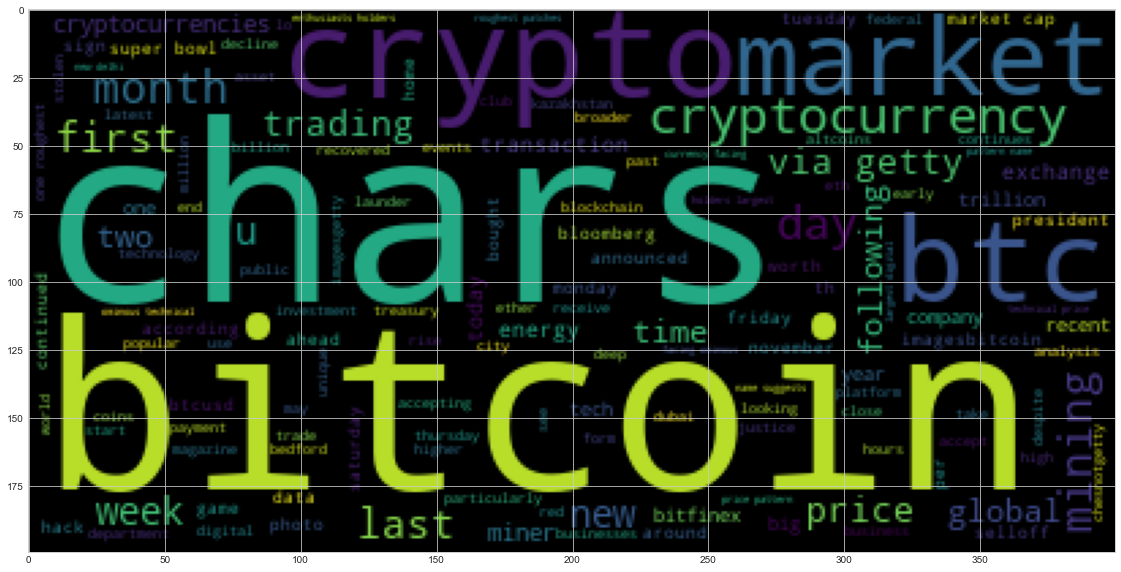

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(tokens_btc))

plt.imshow(wc)

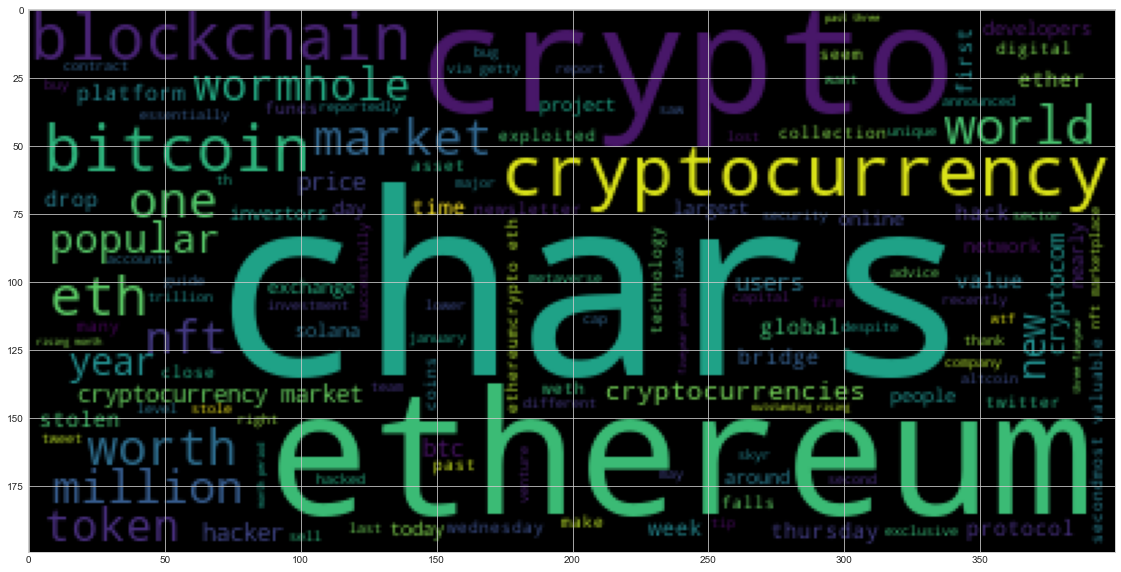

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(tokens_eth))

plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
import spacy

nlp=spacy.load('en_core_web_sm')

nlp

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
ner_content_btc=' '.join(sentiment_btc_df['text'])

ner_content_btc

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] After one of roughest patches ever for Bitcoin enthusiasts, holders of the largest digital currency are facing an ominous technical price pattern with a name that suggests more pain ahead.\xa0\r\nKnown as… [+3529 chars] In an interview with Bloomberg TV, Crypto.com\'s Chief Executive Kris Marszalek has admitted that 400 customer accounts were compromised by hackers. He said his team detected unauthorized transactions… [+2811 chars] LONDON, Jan 14 (Reuters) - Kazakhstan may no longer be the bitcoin sanctuary it once was, according to some big miners who are looking to leave the global crypto hub following internet shutdowns last… [+4521 chars] Bitcoin billionaire Mike Novogratz has said the recovery of $3.6 billion stolen in a 2016 hack on the Bitfinex exchange is a posi

In [30]:
# Run the NER processor on all of the text
ner_btc=nlp(ner_content_btc)

# Add a title to the document
ner_btc.user_data['title']='BTC Named Entity Recognigtion: 2022 02 12'

ner_btc

In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken
Illustration by Alex Castro / The Verge
In a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] After one of roughest patches ever for Bitcoin enthusiasts, holders of the largest digital currency are facing an ominous technical price pattern with a name that suggests more pain ahead. 
Known as… [+3529 chars] In an interview with Bloomberg TV, Crypto.com's Chief Executive Kris Marszalek has admitted that 400 customer accounts were compromised by hackers. He said his team detected unauthorized transactions… [+2811 chars] LONDON, Jan 14 (Reuters) - Kazakhstan may no longer be the bitcoin sanctuary it once was, according to some big miners who are looking to leave the global crypto hub following internet shutdowns last… [+4521 chars] Bitcoin billionaire Mike Novogratz has said the recovery of $3.6 billion stolen in a 2016 hack on the Bitfinex exchange is a positive sign for 

In [31]:
# Render the visualization
displacy.render(ner_btc, style='ent')

In [32]:
# List all Entities
entities_btc=set([ent.text for ent in ner_btc.ents])

entities_btc

{'$1.27 trillion',
 '$1.4 trillion',
 '$2 trillion',
 '$25 million',
 '$3.6 billion',
 '$4.5 billion',
 '$65 million',
 '$9 trillion',
 '+0.12',
 '+0.52%',
 '+11.34%',
 '+1773',
 '+1798',
 '+3049',
 '+4176',
 '-1.71%',
 '1',
 '1,077',
 '1.11%',
 '1.54%',
 '1.6%',
 '1.93%',
 '100',
 '119,756',
 '120,000',
 '1808',
 '1982',
 '1:30 p.m. ET',
 '2',
 '2%',
 '2.01%',
 '2.60%',
 '2013',
 '2016',
 '2020',
 '2021',
 '25th July',
 '270',
 '2955',
 '3.8',
 '315%',
 '38,180',
 '395 per cent',
 '4',
 '4%',
 '4,836',
 '4.5bn',
 '40,000',
 '400',
 '40569',
 '42,399',
 '44-year-old',
 '443',
 '4501',
 '462.1',
 '484.5 BTC',
 '4th',
 '50',
 '50,000',
 '50-day',
 '500',
 '60',
 '660',
 '68%',
 '68,999.99',
 '7.5',
 '75,000',
 'Aarika Rhodes',
 'Alex Castro',
 'Alex Kantrowitz',
 'Ali Khan',
 'Amazon',
 'Apple',
 'April 5th 2021',
 'August 2016',
 'BCH',
 'BRD',
 'BTC',
 'BTC miners.</li></u',
 'BTC treasury',
 'Barring Cardano',
 'Bear Market',
 'Beautifulblossom/iStock Editorial',
 'Bedford',
 'Biden',

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
ner_content_eth=' '.join(sentiment_eth_df['text'])

ner_content_eth

'In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken\r\nIllustration by Alex Castro / The Verge\r\nIn a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] In an interview with Bloomberg TV, Crypto.com\'s Chief Executive Kris Marszalek has admitted that 400 customer accounts were compromised by hackers. He said his team detected unauthorized transactions… [+2811 chars] Online thieves made off with "wrapped ethereum" worth nearly $324 million.\r\nGetty Images\r\nHackers stole more than $324 million in cryptocurrency from Wormhole, the developers behind the popular block… [+1664 chars] Online thieves made off with 120,000 wEth, or wrapped Ethereum, worth nearly $324 million.\r\nGetty Images\r\nHackers have stolen more than $324 million in cryptocurrency from Wormhole, the developers be… [+1553 chars] The crypto market\'s whiplash volatility\xa0can make investing in certain coins feel like a major gamble, especially to those 

In [34]:
# Run the NER processor on all of the text
ner_eth=nlp(ner_content_eth)

# Add a title to the document
ner_eth.user_data['title']='ETH Named Entity Recognigtion: 2022 02 12'

ner_eth

In a new blog post the company said that 4,836 ETH and 443 bitcoin were taken
Illustration by Alex Castro / The Verge
In a blog post published in the early hours of Thursday morning, cryptocurrency… [+2004 chars] In an interview with Bloomberg TV, Crypto.com's Chief Executive Kris Marszalek has admitted that 400 customer accounts were compromised by hackers. He said his team detected unauthorized transactions… [+2811 chars] Online thieves made off with "wrapped ethereum" worth nearly $324 million.
Getty Images
Hackers stole more than $324 million in cryptocurrency from Wormhole, the developers behind the popular block… [+1664 chars] Online thieves made off with 120,000 wEth, or wrapped Ethereum, worth nearly $324 million.
Getty Images
Hackers have stolen more than $324 million in cryptocurrency from Wormhole, the developers be… [+1553 chars] The crypto market's whiplash volatility can make investing in certain coins feel like a major gamble, especially to those less familiar with the i

In [35]:
# Render the visualization
displacy.render(ner_eth,style='ent')

In [36]:
# List all Entities
entities_eth=set([ent.text for ent in ner_eth.ents ])

entities_eth

{'$1 billion',
 '$1.27 trillion',
 '$1.4 trillion',
 '$10 million',
 '$15 billion',
 '$15 million',
 '$2 trillion',
 '$250 million',
 '$322 million',
 '$325 million',
 '+0.12',
 '+0.52%',
 '+11.34%',
 '+1112',
 '+3049',
 '+3176',
 '+402',
 '+6779',
 '0.95',
 '1',
 '1.20',
 '1.6%',
 '1.93%',
 '10 years',
 '12-month',
 '120,000',
 '120k',
 '1808',
 '2,160',
 '2,400',
 '2,450',
 '200',
 '2009',
 '2015',
 '2021',
 '2022',
 '25%',
 '27 days',
 '2955',
 '3,000',
 '3,120',
 '3000',
 '3050',
 '36.2%',
 '4,600',
 '4,836',
 '4.3',
 '40 acres',
 '40,000',
 '400',
 '40569',
 '409%',
 '443',
 '4501',
 '500',
 '60',
 '7000',
 '724,948',
 '7343Location',
 '80%',
 '90',
 'Ac',
 'Accordi',
 'Alex Castro',
 'Alex Kantrowitz',
 'Ali Khan',
 'Amazon',
 'Apple',
 'Avira',
 'Big Technology',
 'Bitcoin',
 'Bitcoin (BTC',
 'Bitcoin and Ethereum',
 'Bitcoin(CRYPTO',
 'BlockBar',
 'Blockchain',
 'Blockverse',
 'Bloomberg TV',
 'Cardano',
 'Chris MacDonald',
 'Coinmarketcap',
 'Coins',
 'Cry',
 'Crypto',
 'Crypt